# Project 4:
## Predict if the client will take up a term deposit (yes/no) ?

### Import packages

In [925]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading in .csv file

In [926]:
clients = pd.read_csv('bank-additional-full.csv')

In [927]:
#Ensure that clients is a dataframe
type(clients)

pandas.core.frame.DataFrame

#### Set Display settings

In [928]:
pd.set_option('display.max_columns', 50) #https://stackoverflow.com/questions/11707586/python-pandas-how-to-widen-output-display-to-see-more-columns
pd.set_option('display.max_rows', 20)

### Understanding the data/Data cleaning & preparation

In [929]:
#Rows: 41,188 vs. Columns: 21
clients.shape

(41188, 21)

In [930]:
#No null values but.. there are some unknown values..
clients.info()
clients.dtypes
clients.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
                 ..
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
Length: 21, dtype: int64

In [931]:
#Screen through the dataset to see the extent of missing values for each variable.
feature_info=clients.columns.tolist()
for i in feature_info:
    print(i)
    print(clients[i].value_counts())

age
31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
      ... 
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
default
no         32588
unknown     8597
yes

In [932]:
#List out all columns under clients dataframe 
clients.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [933]:
#Displaying values as a NumPy array
clients.values[0]

array([56, 'housemaid', 'married', 'basic.4y', 'no', 'no', 'no',
       'telephone', 'may', 'mon', 261, 1, 999, 0, 'nonexistent', 1.1,
       93.994, -36.4, 4.857, 5191.0, 'no'], dtype=object)

In [934]:
#Output first row
clients.iloc[0:1]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [935]:
###Replacing certain values in dataset###
#clients.replace('unknown',np.nan, inplace=True)
#clients.isnull().sum()

In [936]:
#value_counts() return the frequency counts of unique values, 
#sorted by the highest frequency counts, in descending order
#clients["age"].value_counts()

In [937]:
#Features that have unknown values --> Need for imputation
#job - nominal (330 unknowns)
#marital - nominal (80 unknowns)
#education - ordinal (1731 unknowns)
#default - nominal (8597 unknowns)
#housing - nominal (990 unknowns)
#loan - nominal (990 unknowns)

##### Remove duplicate rows

In [938]:
#Check for duplicated rows
#.duplicated() will return true if the row above is the same
clients.duplicated().sum()

12

In [939]:
#Assessing if the dups are indeed d
#With "keep=False" argument, all dups will be marked as True
is_duplicate = clients.duplicated(keep=False)
clients[is_duplicate]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [940]:
#.duplicated will return True if the row above is a dup
clients[clients.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [941]:
#Yet to incorporate into the clients dataframe 
#Removing the last row of dup record & check the shape of the new dataframe - should have less than 12 rows
clients.drop_duplicates(keep="first").shape

(41176, 21)

In [942]:
#Incorporated into the clients dataframe --> Drop dup rows with inplace=True
clients.drop_duplicates(keep="first", inplace=True)
clients.shape

(41176, 21)

#### Impute for missing values

In [943]:
#test code --> How NaN will be identified
x = [1,2,3,np.nan]
y = pd.DataFrame(data=x)
y.isnull()

,0
0,False
1,False
2,False
3,True


#### Split clients dataset into object vs. numerical container

In [944]:
clients_cat = clients.select_dtypes(['object'])

In [945]:
#dropping the last column - y, the target variable, in a dataframe
#https://stackoverflow.com/questions/45196965/pandas-drop-last-column-of-dataframe?rq=1 
#clients_cat=clients_cat.iloc[:,:-1]

In [946]:
clients_cat.shape

(41176, 11)

In [947]:
#Basic descripitive statistics on categorical variables
clients.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


In [948]:
clients_cat.y

0         no
1         no
2         no
3         no
4         no
5         no
6         no
7         no
8         no
9         no
        ... 
41178    yes
41179     no
41180     no
41181    yes
41182     no
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41176, dtype: object

#### Treating categorical data:
#### Convert each categorical variable into numerical encoding to prepare for KNN imputation

##### job

In [949]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
job_LE = le.fit_transform(clients_cat['job'].values)
job_LE

array([3, 7, 7, ..., 5, 9, 5])

In [950]:
le.fit(clients['job'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}


In [951]:
jobLE=[]
for item in job_LE:
    if item == 11:
        item = np.nan
        jobLE.append(item)
    else:
        jobLE.append(item)
jobLE=pd.Series(jobLE)
jobLE.isnull().sum()

#how to replace a value in a series:
#https://stackoverflow.com/questions/45709743/how-to-replace-a-value-in-array-in-numpy-python

#how to convert a panda list to a series: 
#https://stackoverflow.com/questions/48783650/how-to-convert-python-list-to-pandas-series

330

##### marital

In [952]:
marital_LE = le.fit_transform(clients_cat['marital'].values)
marital_LE

array([1, 1, 1, ..., 1, 1, 1])

In [953]:
le.fit(clients['marital'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

#get mapping of cat variables in pandas
#https://stackoverflow.com/questions/30510562/get-mapping-of-categorical-variables-in-pandas 

{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}


In [954]:
maritalLE=[]
for item in marital_LE:
    if item == 3:
        item = np.nan
        maritalLE.append(item)
    else:
        maritalLE.append(item)
maritalLE=pd.Series(maritalLE)
maritalLE.isnull().sum()

80

##### education - ordinal data

In [955]:
edu_mapping={'illiterate':0, 'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4, 'professional.course':5, 
            'university.degree':6, 'unknown':7}

In [956]:
edu_LE = np.array(clients_cat['education'].map(edu_mapping))
edu_LE

array([1, 4, 4, ..., 6, 5, 5])

In [957]:
eduLE=[]
for item in edu_LE:
    if item == 7:
        item = np.nan
        eduLE.append(item)
    else:
        eduLE.append(item)
eduLE=pd.Series(eduLE)
eduLE.isnull().sum()

1730

In [958]:
#clients.groupby('education').education.value_counts()

In [959]:
#edu_LE = class_le.fit_transform(clients_cat['education'].values)

In [960]:
#le.fit(clients['education'])
#le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#print(le_name_mapping)

In [961]:
#eduLE=[]
#for item in edu_LE:
    #if item == 7:
        #item = np.nan
        #eduLE.append(item)
    #else:
        #eduLE.append(item)
#eduLE=pd.Series(eduLE)
#eduLE.isnull().sum()

##### default

In [962]:
default_LE = le.fit_transform(clients_cat['default'].values)

In [963]:
le.fit(clients['default'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'no': 0, 'unknown': 1, 'yes': 2}


In [964]:
defaultLE=[]
for item in default_LE:
    if item == 1:
        item = np.nan
        defaultLE.append(item)
    else:
        defaultLE.append(item)
defaultLE=pd.Series(defaultLE)
defaultLE.isnull().sum()

8596

##### housing

In [965]:
housing_LE = le.fit_transform(clients_cat['housing'].values)

In [966]:
le.fit(clients['housing'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'no': 0, 'unknown': 1, 'yes': 2}


In [967]:
housingLE=[]
for item in housing_LE:
    if item == 1:
        item = np.nan
        housingLE.append(item)
    else:
        housingLE.append(item)
housingLE=pd.Series(housingLE)
housingLE.isnull().sum()

990

##### loan

In [968]:
loan_LE = le.fit_transform(clients_cat['loan'].values)

In [969]:
le.fit(clients['loan'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'no': 0, 'unknown': 1, 'yes': 2}


In [970]:
loanLE=[]
for item in loan_LE:
    if item == 1:
        item = np.nan
        loanLE.append(item)
    else:
        loanLE.append(item)
loanLE=pd.Series(loanLE)
loanLE.isnull().sum()

990

##### contact

In [971]:
contact_LE = le.fit_transform(clients_cat['contact'].values)

In [972]:
le.fit(clients['contact'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'cellular': 0, 'telephone': 1}


In [973]:
contactLE=pd.Series(contact_LE)
contactLE.isnull().sum()

0

##### month

In [974]:
month_LE = le.fit_transform(clients_cat['month'].values)

In [975]:
le.fit(clients['month'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'apr': 0, 'aug': 1, 'dec': 2, 'jul': 3, 'jun': 4, 'mar': 5, 'may': 6, 'nov': 7, 'oct': 8, 'sep': 9}


In [976]:
monthLE=pd.Series(month_LE)
monthLE.isnull().sum()

0

##### day_of_week

In [977]:
dow_LE = le.fit_transform(clients_cat['day_of_week'].values)

In [978]:
le.fit(clients['day_of_week'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'fri': 0, 'mon': 1, 'thu': 2, 'tue': 3, 'wed': 4}


In [979]:
dowLE=pd.Series(dow_LE)
dowLE.isnull().sum()

0

##### poutcome

In [980]:
pout_LE = le.fit_transform(clients_cat['poutcome'].values)

In [981]:
le.fit(clients['poutcome'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'failure': 0, 'nonexistent': 1, 'success': 2}


In [982]:
poutLE=pd.Series(pout_LE)
poutLE.isnull().sum()

0

#### y

In [983]:
y_LE = le.fit_transform(clients_cat['poutcome'].values)

In [984]:
le.fit(clients['y'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'no': 0, 'yes': 1}


In [985]:
yLE=pd.Series(y_LE)
yLE.isnull().sum()

0

#### Concat all cat series tog into a dataframe

In [986]:
#concating 2 series into a dataframe
#https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.concatenate.html 
y_incomplete = pd.concat([jobLE, maritalLE], axis=1)
y_incomplete.head()

#assigning column names to the new series
y_incomplete.columns = ['jobLE', 'maritalLE']
y_incomplete.head()

,jobLE,maritalLE
0,3.0,1.0
1,7.0,1.0
2,7.0,1.0
3,0.0,1.0
4,7.0,1.0


In [987]:
clients_cat_incomplete = pd.concat([jobLE, maritalLE, eduLE, defaultLE, housingLE, loanLE, contactLE, monthLE, dowLE, poutLE, yLE], axis=1)
clients_cat_incomplete.columns = ['jobLE', 'maritalLE','eduLE', 'defaultLE', 'housingLE', 'loanLE', 'contactLE', 'monthLE', 'dowLE', 'poutLE', 'yLE']
clients_cat_incomplete.info()
clients_cat_incomplete.head()
clients_cat_incomplete.shape
#unable to convert non-finite values (NA or inf) to integer
#mylist=['jobLE', 'maritalLE','eduLE', 'defaultLE', 'housingLE', 'loanLE', 'contactLE', 'monthLE', 'dowLE', 'poutLE']
#for column in mylist:
    #clients_cat_incomplete[column] = clients_cat_incomplete[column].astype('int64')
#clients_cat_incomplete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 11 columns):
jobLE        40846 non-null float64
maritalLE    41096 non-null float64
eduLE        39446 non-null float64
defaultLE    32580 non-null float64
housingLE    40186 non-null float64
loanLE       40186 non-null float64
contactLE    41176 non-null int64
monthLE      41176 non-null int64
dowLE        41176 non-null int64
poutLE       41176 non-null int64
yLE          41176 non-null int64
dtypes: float64(6), int64(5)
memory usage: 3.5 MB


(41176, 11)

In [988]:
clients_cat_incomplete.isnull().sum()

jobLE         330
maritalLE      80
eduLE        1730
defaultLE    8596
housingLE     990
loanLE        990
contactLE       0
monthLE         0
dowLE           0
poutLE          0
yLE             0
dtype: int64

In [989]:
################Applying normalisation on columns with NaNs cannot work.....
#mms = MinMaxScaler(feature_range=(0,1))
#clients_cat_incomplete_norm = mms.fit_transform(clients_cat_incomplete)
#clients_cat_incomplete_norm = pd.DataFrame(clients_cat_incomplete, index=clients_cat_incomplete.index, columns=clients_cat_incomplete.columns)
#clients_cat_incomplete_norm

In [990]:
#clients_cat_incomplete.dowLE
#dowLE_GD = pd.get_dummies(clients_cat_incomplete.dowLE)
#dowLE_GD.columns = ["fri", "mon", "thu", "tue", "wed"] #https://stackoverflow.com/questions/41685917/rename-dataframe-column-based-on-column-index
#dowLE_GD = dowLE_GD.iloc[:,1:] #https://stackoverflow.com/questions/19973489/pandas-remove-column-by-index
#dowLE_GD.head()

In [991]:
#dowLE_GD = pd.get_dummies(clients_cat_incomplete.dowLE).add_prefix('cat_') #https://stackoverflow.com/questions/50414823/how-to-keep-columns-names-after-one-hot-encoding-sklearn
#dowLE_GD.head()

In [992]:
#clients_cat.replace('unknown', np.nan, inplace=True) #https://stackoverflow.com/questions/17142304/replace-string-value-in-entire-dataframe
#clients_cat.isnull().sum()
#clients_cat_gd= pd.get_dummies(clients_cat)
#clients_cat_gd  #https://www.theanalysisfactor.com/multiple-imputation-for-missing-data-indicator-variables-versus-categorical-variable/

In [993]:
#using KNN to do imputation
#https://stackoverflow.com/questions/45321406/missing-value-imputation-in-python-using-knn

#steps to do imputation on missing values in cat variables
#https://stackoverflow.com/questions/43518364/knn-imputation-of-categorical-variables-in-python 

#from fancyimpute import KNN
#y_filled_knn = KNN(k=3).complete(y_incomplete)

In [994]:
#randomise all rows to ensure data is not sorted
#https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
clients_cat_incomplete.shape
clients_cat_incomplete.sample(frac=1).shape

#frac=1, means to return all rows in random order

(41176, 11)

In [995]:
#*****************TAEKS A LONG TIME, DO NOT ANYHOW EXECUTE***************************
#from fancyimpute import KNN
#clients_cat_filled = KNN(k=3).complete(clients_cat_incomplete)

In [996]:
y_filled_knn = pd.DataFrame(y_filled_knn)
y_filled_knn.isnull().sum()

NameError: name 'y_filled_knn' is not defined

##### Treating numerical data:
##### Normalise each column

In [997]:
clients_num = clients.select_dtypes(['int64', 'float64'])
clients_num.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [998]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0,1))
clients_num_norm = mms.fit_transform(clients_num)

#clients_num_norm = pd.DataFrame(clients_num_norm)
#clients_num_norm.columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
clients_num_norm = pd.DataFrame(clients_num_norm, index=clients_num.index, columns=clients_num.columns) #http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
clients_num_norm       #https://stackoverflow.com/questions/46644008/sklearn-minmaxscaler-that-save-rows-and-columns-headers-python

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.481481,0.053070,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
1,0.493827,0.030297,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
2,0.246914,0.045954,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
3,0.283951,0.030704,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
4,0.481481,0.062424,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
5,0.345679,0.040260,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
6,0.518519,0.028264,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
7,0.296296,0.044124,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
8,0.086420,0.077267,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
9,0.098765,0.010167,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735


In [999]:
clients_num_norm.pdays.replace(to_replace=1.0,value=np.nan, inplace=True)
clients_num_norm.isnull().sum()

age                   0
duration              0
campaign              0
pdays             39661
previous              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
dtype: int64

In [1000]:
type(clients_num_norm)
type(clients_num)

pandas.core.frame.DataFrame

In [1001]:
#Basic descriptive statistics on numerical variables 
clients_num_norm.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.000000,41176.000000,41176.000000,1515.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,0.284244,0.052525,0.028507,0.006021,0.024716,0.725400,0.535744,0.430843,0.677237,0.769130
std,0.128650,0.052726,0.050369,0.003829,0.070709,0.327267,0.225580,0.193634,0.393207,0.273162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185185,0.020740,0.000000,0.003003,0.000000,0.333333,0.340608,0.338912,0.160961,0.512287
50%,0.259259,0.036600,0.018182,0.006006,0.000000,0.937500,0.603274,0.376569,0.957379,0.859735
75%,0.370370,0.064864,0.036364,0.007007,0.000000,1.000000,0.698753,0.602510,0.980957,1.000000
max,1.000000,1.000000,1.000000,0.027027,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Exploratory Data Analysis

#### A. Assessing pairwise correlation coefficients of numerical variables

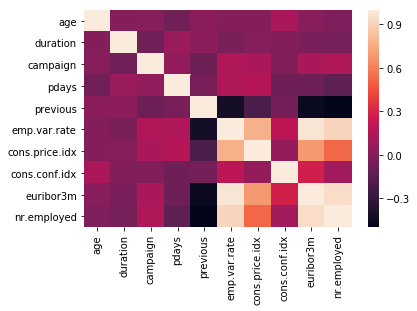

In [1002]:
sns.heatmap(clients_num_norm.corr())

#### B. Assessing distribution plots for each num variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a30077898>]],
      dtype=object)

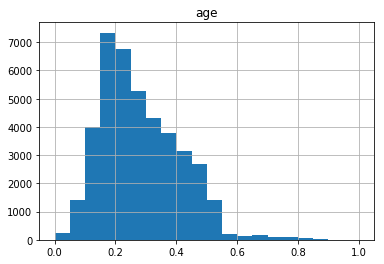

In [1003]:
clients_num_norm.hist(column="age", bins=20)

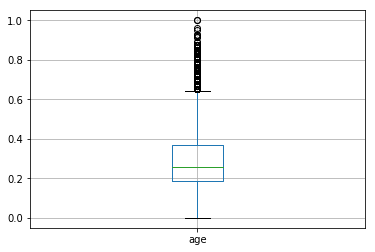

In [1004]:
clients_num_norm.boxplot(column="age")

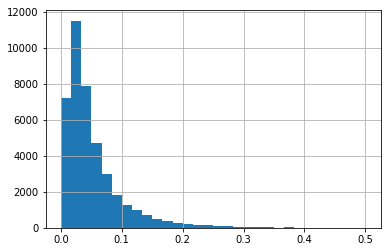

In [1005]:
clients_num_norm["duration"].hist(bins=30, range=(0,0.5))
#clients_num["duration"].hist(bins=20, range=(0,2000))

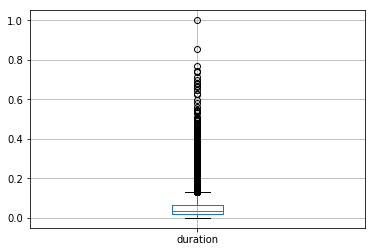

In [1006]:
clients_num_norm.boxplot(column="duration")

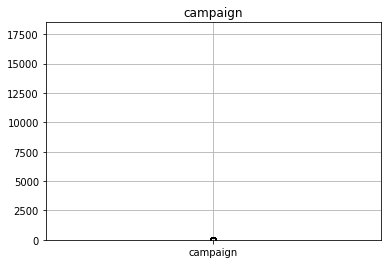

In [1007]:
clients_num_norm.hist(column="campaign", bins=30, range=(0,0.4))
clients_num_norm.boxplot(column="campaign")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3015e748>]],
      dtype=object)

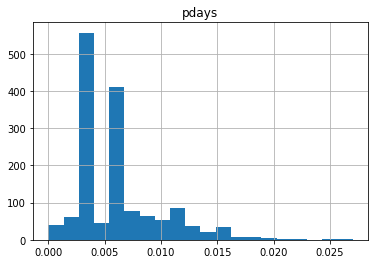

In [1008]:
clients_num_norm.hist(column="pdays", bins=20)

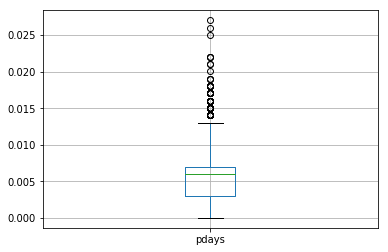

In [1009]:
clients_num_norm.boxplot(column="pdays")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a317ab668>]],
      dtype=object)

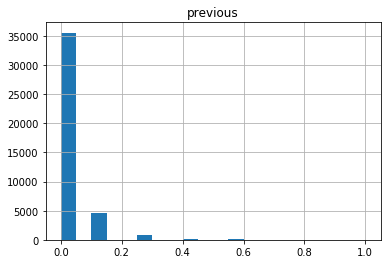

In [1010]:
clients_num_norm.hist(column="previous", bins=20)

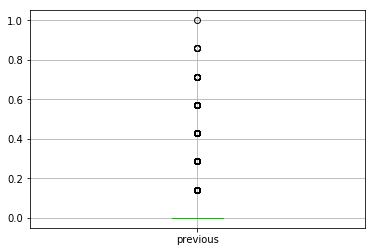

In [1011]:
clients_num_norm.boxplot(column="previous")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a36bd3208>]],
      dtype=object)

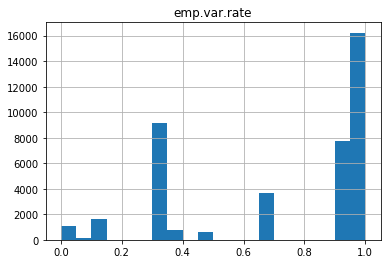

In [1012]:
clients_num_norm.hist(column="emp.var.rate", bins=20)

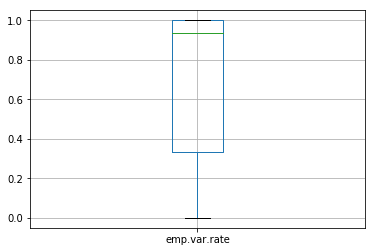

In [1013]:
clients_num_norm.boxplot(column="emp.var.rate")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4d5a6a90>]],
      dtype=object)

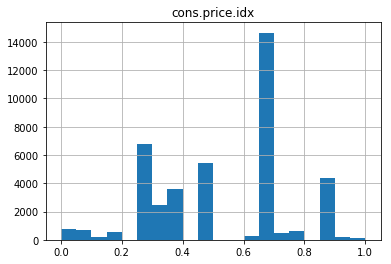

In [1014]:
clients_num_norm.hist(column="cons.price.idx", bins=20)

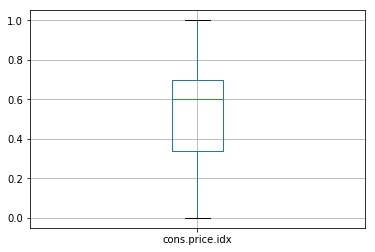

In [1015]:
clients_num_norm.boxplot(column="cons.price.idx")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4d515128>]],
      dtype=object)

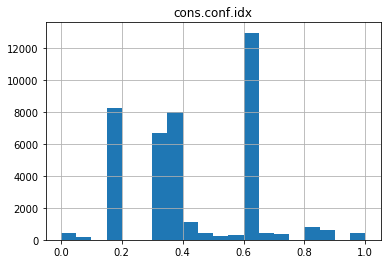

In [1016]:
clients_num_norm.hist(column="cons.conf.idx", bins=20)

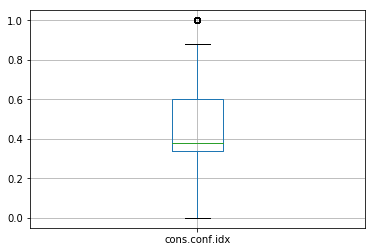

In [1017]:
clients_num_norm.boxplot(column="cons.conf.idx")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4d96d1d0>]],
      dtype=object)

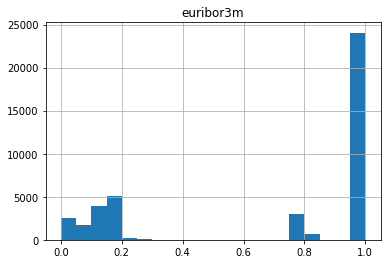

In [1018]:
clients_num_norm.hist(column="euribor3m", bins=20)

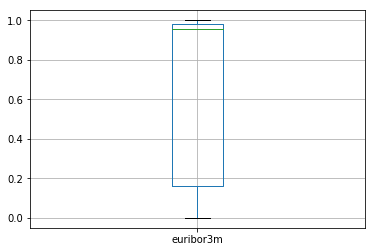

In [1019]:
clients_num_norm.boxplot(column="euribor3m")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4d895c50>]],
      dtype=object)

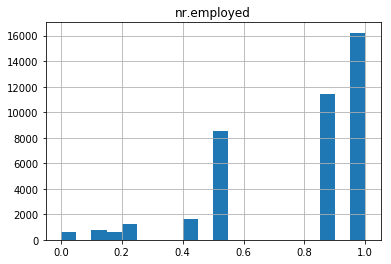

In [1020]:
clients_num_norm.hist(column="nr.employed", bins=20)

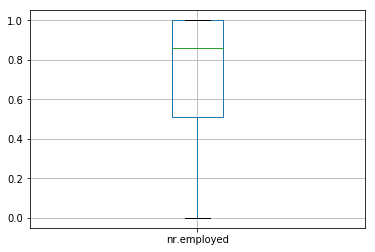

In [1021]:
clients_num_norm.boxplot(column="nr.employed")

#### Assessing VIF for each num variable. VIF is not defined for cat variables. 

   **- VIF not applicable for cat variables:** https://stats.stackexchange.com/questions/285722/vif-doesnt-show-up-values-for-categorical-variables

   **- statsmodel documentation:** http://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

   **- Auxillary regression:** https://www.quora.com/How-can-we-calculate-the-variance-inflation-factor-for-a-categorical-predictor-variable-when-examining-multicollinearity-in-a-linear-regression-model

#### 1st indication to drop p_days : 96% of the values are null...

In [1022]:
noNaN_pdays = clients_num_norm.pdays.dropna(how='all')
noNaN_pdays.var()
noNaN_pdays.count()
print("% of non-missing values for p_days: " + str((clients_num_norm.pdays.count()/clients_num_norm.age.count())*100))

% of non-missing values for p_days: 3.6793277637458717


##### 2nd indication to drop p_days : variance is small...

In [1023]:
noNaN_pdays.var()

1.4659211642576023e-05

#### Assessing the variance of each numerical variable

In [1024]:
result = clients_num_norm.var(axis=0)*100
result.sort_values(ascending=False) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html

euribor3m         15.461191
emp.var.rate      10.710383
nr.employed        7.461751
cons.price.idx     5.088646
cons.conf.idx      3.749425
age                1.655092
previous           0.499979
duration           0.278001
campaign           0.253708
pdays              0.001466
dtype: float64

#### DROP p_days

In [1025]:
clients_num_norm.drop(columns='pdays', inplace=True)

#### Assessing VIF for the remaining num variables:
(High VIF is a sign of multicollinearity -- VIF > 8 for any vairable will be a cause of concern)

(e.g. a variable of VIF =1 means the coefficients of that variable is inflated by 4x higher due to multicollinerity)

In [1026]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
clients_num_norm_values = clients_num_norm.values #https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array-preserving-index
for i in range(9):
    j = ['age','duration','campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
    print(str(j[i]) + ": " + str(round(variance_inflation_factor(clients_num_norm_values, i))))
    
    #print(round(variance_inflation_factor(clients_num_norm_values, i)))
          
#for j in ['age','duration','campaign', 'pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']:
#print(str(j) + ": " + str(variance_inflation_factor(clients_num_norm_values, i)))

age: 6.0
duration: 2.0
campaign: 1.0
previous: 1.0
emp.var.rate: 194.0
cons.price.idx: 24.0
cons.conf.idx: 6.0
euribor3m: 82.0
nr.employed: 46.0


#### DROP all num variables with VIF > 8
***** duration is dropped as suggested by UCI dataset instructions http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1027]:
clients_num_norm.drop(columns=['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'duration'], inplace=True)

In [1028]:
#check that variables 'p_days', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed' , 'duration', have indeed been dropped
clients_num_norm

,age,campaign,previous,cons.conf.idx
0,0.481481,0.000000,0.000000,0.60251
1,0.493827,0.000000,0.000000,0.60251
2,0.246914,0.000000,0.000000,0.60251
3,0.283951,0.000000,0.000000,0.60251
4,0.481481,0.000000,0.000000,0.60251
5,0.345679,0.000000,0.000000,0.60251
6,0.518519,0.000000,0.000000,0.60251
7,0.296296,0.000000,0.000000,0.60251
8,0.086420,0.000000,0.000000,0.60251
9,0.098765,0.000000,0.000000,0.60251


In [1032]:
clients_num_norm.isnull().sum()

age              0
campaign         0
previous         0
cons.conf.idx    0
dtype: int64

In [1037]:
final = pd.concat([clients_cat_incomplete,clients_num_norm], axis=1, join='inner')
#final = clients_cat_incomplete.join(clients_num_norm)
#final = clients_cat_incomplete.merge(clients_num_norm, left_index=True, right_index=True)
final

,jobLE,maritalLE,eduLE,defaultLE,housingLE,loanLE,contactLE,monthLE,dowLE,poutLE,yLE,age,campaign,previous,cons.conf.idx
0,3.0,1.0,1.0,0.0,0.0,0.0,1,6,1,1,1,0.481481,0.000000,0.000000,0.60251
1,7.0,1.0,4.0,NaN,0.0,0.0,1,6,1,1,1,0.493827,0.000000,0.000000,0.60251
2,7.0,1.0,4.0,0.0,2.0,0.0,1,6,1,1,1,0.246914,0.000000,0.000000,0.60251
3,0.0,1.0,2.0,0.0,0.0,0.0,1,6,1,1,1,0.283951,0.000000,0.000000,0.60251
4,7.0,1.0,4.0,0.0,0.0,2.0,1,6,1,1,1,0.481481,0.000000,0.000000,0.60251
5,7.0,1.0,3.0,NaN,0.0,0.0,1,6,1,1,1,0.345679,0.000000,0.000000,0.60251
6,0.0,1.0,5.0,0.0,0.0,0.0,1,6,1,1,1,0.518519,0.000000,0.000000,0.60251
7,1.0,1.0,NaN,NaN,0.0,0.0,1,6,1,1,1,0.296296,0.000000,0.000000,0.60251
8,9.0,2.0,5.0,0.0,2.0,0.0,1,6,1,1,1,0.086420,0.000000,0.000000,0.60251
9,7.0,2.0,4.0,0.0,2.0,0.0,1,6,1,1,1,0.098765,0.000000,0.000000,0.60251


In [1038]:
final.isnull().sum()

jobLE             330
maritalLE          80
eduLE            1730
defaultLE        8592
housingLE         990
loanLE            990
contactLE           0
monthLE             0
dowLE               0
poutLE              0
yLE                 0
age                 0
campaign            0
previous            0
cons.conf.idx       0
dtype: int64

In [1031]:
#Combine cat and num ddataframe together
clients_all_num = clients.select_dtypes(['int64', 'float64'])
clients_all_num
I = pd.concat([y_filled_knn,clients_all_num], axis=1)

NameError: name 'y_filled_knn' is not defined

#### Imputing missing values

In [ ]:
#sns.pairplot(clients)

In [ ]:
#calculating variance of the numeric variables, without standardisation
clients.var()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(clients_all_num)
clients_all_num_std = sc.transform(clients_all_num)
clients_all_num_std[1]

In [ ]:
mms = MinMaxScaler()
clients_all_num_norm = mms.fit_transform(clients_all_num)
clients_all_num_norm

In [ ]:
from sklearn.feature_selection import VarianceThreshold
thresholder=VarianceThreshold(0.01)
features_high_var = thresholder.fit_transform(clients_all_num_norm)
features_high_var[0]